### Финальный проект: разведочный анализ данных

Финальный проект по предмету "Python для анализа данных". Автор:Вершинин Сергей

Импортируем библиотеку Pandas и другие библиотеки и загрузим датасет, который будем анализировать, в DataFrame. 
Выведем случайные 5 строк, чтобы примерно понять, с какими данными имеем дело

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('netflix_titles.csv')
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3682,s3683,TV Show,The Legend of White Snake,NaN,"Yu Menglong, Ju Jingyi, Pei Zitian, Xiao Yan, ...",China,"July 5, 2019",2019,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","In this new take on a classic tale, an ancient..."
5196,s5197,Movie,Judah Friedlander: America Is the Greatest Cou...,Judah Friedlander,Judah Friedlander,United States,"October 31, 2017",2017,TV-MA,84 min,Stand-Up Comedy,Deadpan comic and self-proclaimed world champi...
7529,s7530,TV Show,Mutant Busters,NaN,"Dermot Arrigan, James Giblin, Noah Levin, Moll...",Spain,"June 1, 2017",2017,TV-PG,2 Seasons,"Kids' TV, TV Comedies",After a natural disaster known as the Big Fart...
3626,s3627,Movie,Misfit,Erwin van den Eshof,"Djamila, Niek Roozen, Bente Fokkens, Jolijn He...",Netherlands,"August 3, 2019",2017,TV-14,81 min,"Children & Family Movies, Comedies, Internatio...","After living in America for years, a teenage g..."
6586,s6587,TV Show,Deep Undercover Collection,NaN,Dave B. Mitchell,United States,"July 20, 2018",2017,TV-MA,3 Seasons,"Crime TV Shows, Docuseries","Former FBI agent Joe Pistone, the real-life ""D..."


Видим, что датасет состоит из данных о фильмах и сериалах, выпущенных на платформе Netflix. 

Посмотрим на них подробнее. Для этого выведем количество строк и столбцов фрейма, а также 
характеристики данных в отдельных столбцах (и информацию о соответствующих типах данных)  

In [7]:
df.shape

(8807, 12)

In [6]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [10]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


Видим, что в датасете 8807 строк с данными о фильмах и сериалах, описанных следующими признаками:
1. Идентификатор фильма или сериала (show_id) - столбец с уникальными строковыми значениями, без пропусков
2. Тип (type) - Movie или TV Show, без пропусков, с двумя строчными значениями, из которых наиболее часто встречается Movie
3. Наименование (title) - наименование фильма/сериала, уникальные строчные значения, без пропусков
4. Режисер (director) - строчный признак с указанием режиссера фильма или сериала, с пропусками
5. Состав актеров (cast) - строчный признак с участвующими в фильме/сериале актерами; актеры перечисляются через запятую; поле содержит пропуски
6. Страна производства (country) - строчный признак с наименованием страны производства фильма/сериала; с пропусками
7. Дата добавления в список (date_added) - дата добавления фильма/сериала в список, строчное значение, с пропусками 
8. Год выпуска (release_year) - год выпуска фильма или сериала, целочисленный признак, без пропусков; минимальное значение 1925, максимальное 2021.
9. Рейтинг (rating) - рейтинг фильма/сериала, определяющие ограничение на показ, чаще всего разным возрастным категориям; строковый признак, но с небольшим числом пропусков (всего 4 пропуска)
10. Продолжительность (duration) - продолжительность фильма/сериала; предположительно, для фильма - в минутах, для сериала - в сезонах; строковый, с 3мя пропусками
11. Жанр (listed_in) - один или несколько жанров, к которым отнесен фильм/сериал; строковый, без пропусков
12. Описание (description) - краткое описания фильма/сериала, строковый, без пропусков


Таким образом: 
- из 12 признаков только 1 численный
- в 6 признаках из 12 нет пропусков, еще в 2 - они единичные, а в остальных 4 - их довольно много   

Посмотрим на некоторые признаки и их взаимосвязи чуть подробнее.

**Страна производства и год выпуска** 

Посмотрим на распределение количества фильмов и сериалов по странам и годам производства, с разбивкой на тип (фильм/сериал) 

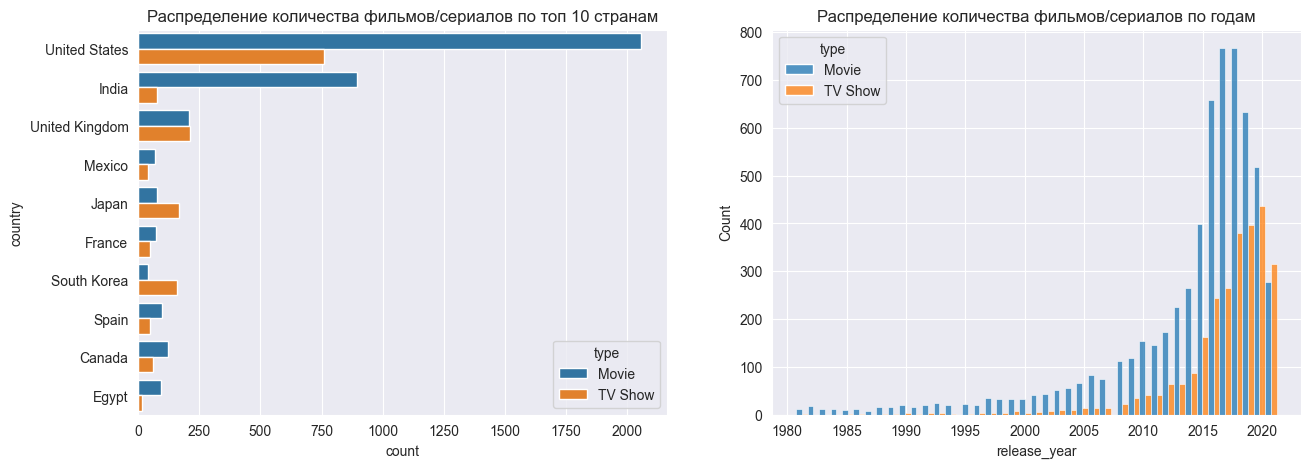

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

top10_countries = list(map(lambda item: item[0], df['country'].value_counts().head(10).items()))
sns.countplot(data=df[df['country'].apply(lambda c: c in top10_countries)], y='country', hue='type', ax=ax[0])
ax[0].set_title('Распределение количества фильмов/сериалов по топ 10 странам')


sns.histplot(data=df[df['release_year']>1980], x='release_year', hue='type', multiple="dodge", shrink=2, ax=ax[1])
ax[1].set_title('Распределение количества фильмов/сериалов по годам')

plt.show()

Из графиков видно, что: 
1) основные производители фильмов и сериалов - США, Индия и Великобритания. Причем, если брать только сериалы, то Индия уже не в тройке
2) на интервале с 1980 года количество фильмов растет вплоть до середины 2010-х годов, а потом начинает немного снижаться
3) заметное по сравнению с количеством фильмов количество сериалов начинает появляться только в начале 2000-х годов и растет чуть дольше - вплоть до 2020, после чего начинает снижаться (видимо, из-за пандемии ковид)   

Теперь посмотрим на еще один признак - год добавления данных о фильме в список. Т.к. соответствующий признак (date_added) - это просто строка, **сформируем на ее основе новый столбец** в датасете, куда запишем год добавления данных о фильме в БД. И представим распределение количества фильмов по годам добавления.

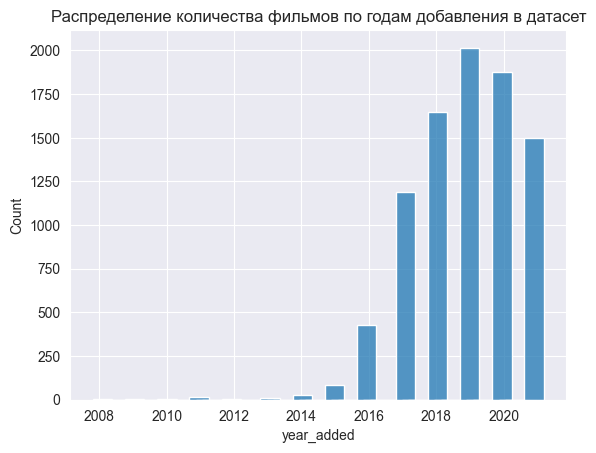

In [119]:
df['year_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y').dt.year
sns.histplot(data = df, x = 'year_added', shrink=3)
plt.title('Распределение количества фильмов по годам добавления в датасет')
plt.show()

Из графика видно, что добавления данных в БД активно началось примерно в 2014 году. 
Посмотрим на зависимость года добавления в БД и года выпуска. Для этого посчитаем коэффициент корреляции. 


In [180]:
df[['year_added', 'release_year']].corr()

,year_added,release_year
year_added,1.000000,0.111531
release_year,0.111531,1.000000


Корреляция не очень значимая. Но все-таки можно предположить, что сначала в БД заносились фильмы текущих лет, а позже - начали вводить ретроспективные данные о фильмах более старых лет. Нанесем соответствующие точки на график. 

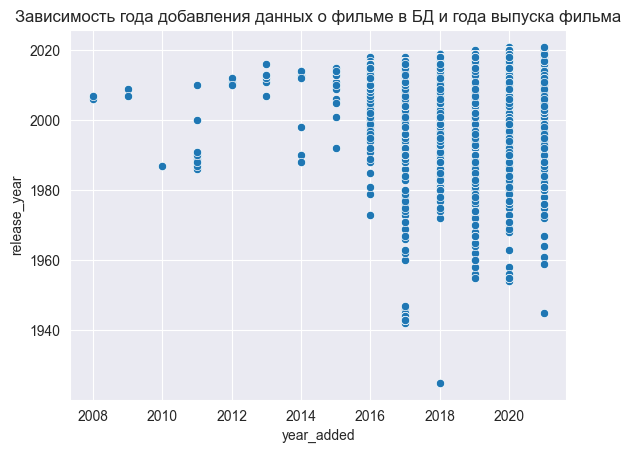

In [123]:
sns.scatterplot(data=df, x = 'year_added', y = 'release_year')
plt.title('Зависимость года добавления данных о фильме в БД и года выпуска фильма')
plt.show()

Действительно, можно наблюдать описанную выше закономерность, когда более старые фильмы появлялись в БД в более поздние годы.

**Режиссер** 

Ели предположить, что режиссеры, как и актеры, могу быть указаны в столбце через запятую, то 
получить фильмы/сериалы c двумя и более режиссерами можно так

In [12]:
df_multiple_directors = df[df['director'].apply(lambda s: len(str(s).split(',')) > 1)]
df_multiple_directors.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
23,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,"September 21, 2021",2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
30,s31,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...","Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...",NaN,"September 17, 2021",2021,TV-14,111 min,"Dramas, Independent Movies, International Movies","As big city life buzzes around them, lonely so..."
68,s69,Movie,Schumacher,"Hanns-Bruno Kammertöns, Vanessa Nöcker, Michae...",Michael Schumacher,NaN,"September 15, 2021",2021,TV-14,113 min,"Documentaries, International Movies, Sports Mo...",Through exclusive interviews and archival foot...


Действительно, для определенного количества строк указано два или более режиссера. Можно предположить, что несколько режиссеров чаще встречается у сериалов, чем у фильмов. Проверим, так ли это.

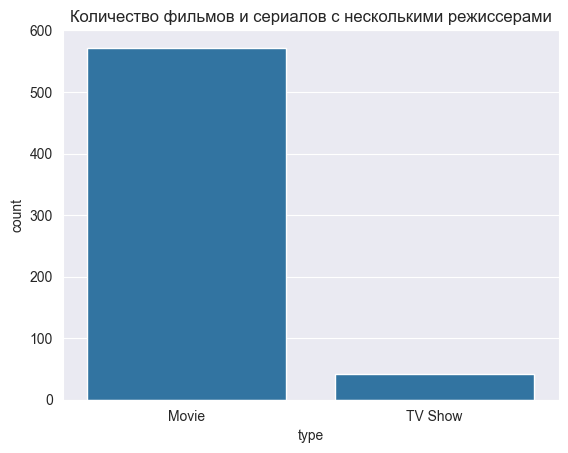

In [127]:
sns.countplot(data = df_multiple_directors, x = 'type')
plt.title('Количество фильмов и сериалов с несколькими режиссерами')
plt.show()


Из графика видим, что предположение не подтвердилось и фильмов с несколькими режиссерами в датасете больше, чем сериалов.

Теперь посмотрим на топ 20 режиссеров с наибольшим количеством фильмов в базе Netflix.  

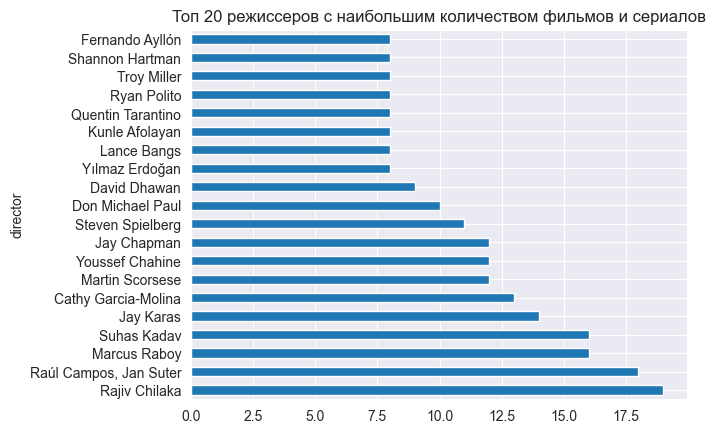

In [170]:
df['director'].value_counts().head(20).plot.barh()
plt.title('Топ 20 режиссеров с наибольшим количеством фильмов и сериалов')
plt.show()

Да, мы видим в списке Скорсезе, Спилберга и Тарантино, но самый топ - это некий Rajiv Chilaka, которого лично я не знаю :(

**Продолжительность** 

Проанализируем продолжительность фильмов и сериалов. К сожалению, продолжительность сериалов дана только в количестве сезонов. Кроме того, продолжительность как фильмов, так и сериалов записана в одном поле. Введем два новых поля для продолжительности фильма (в минутах) и продолжительности сериала (в сезонах) 

In [ ]:
df['film_duration'] = df['duration'].apply(lambda s: int(str(s).split()[0]) if 'min' in str(s) else None)
df['tv_series_duration'] = df['duration'].apply(lambda s: int(str(s).split()[0]) if 'eason' in str(s) else None)

Убедимся, что соответствующие поля заполнились только для соответствующих значений признака type

In [153]:
df[~df['film_duration'].isna()]['type'].value_counts()

type
Movie    6128
Name: count, dtype: int64

In [152]:
df[~df['tv_series_duration'].isna()]['type'].value_counts()



type
TV Show    2676
Name: count, dtype: int64

А теперь посмотрим на зависимость длительности фильмов и года их производства, рассчитав корреляцию и нарисовав график рассеяния  

In [154]:
df[['release_year', 'film_duration']].corr()

,release_year,film_duration
release_year,1.000000,-0.206285
film_duration,-0.206285,1.000000


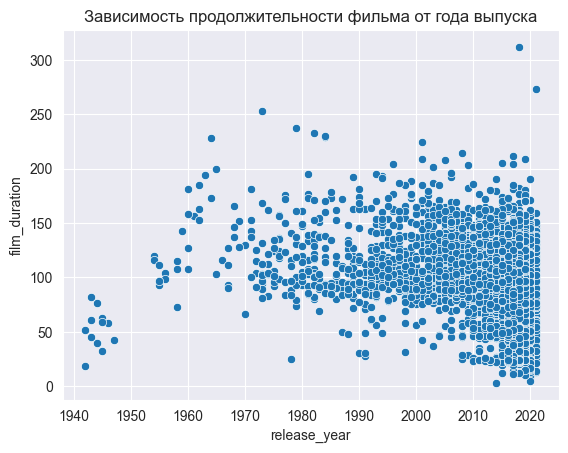

In [171]:
sns.scatterplot(data = df, x = 'release_year', y='film_duration')
plt.title('Зависимость продолжительности фильма от года выпуска')
plt.show()

Коэффициент корреляции параметров не очень велик, однако график отражает такую закономерность: с годами длительность фильмов становится разнообразнее. С одной стороны, становится чуть больше длинных фильмов. С другой - появляется все больше короткометражек.

Теперь посмотрим на зависимость количества сезонов в сериалах от года выпуска. 

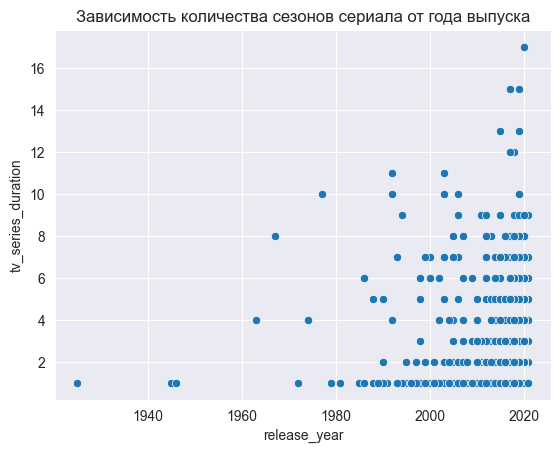

In [172]:
sns.scatterplot(data = df, x = 'release_year', y='tv_series_duration')
plt.title('Зависимость количества сезонов сериала от года выпуска')
plt.show()

Из графика рассеяния можно сделать вывод, что с годами появляется больше сериалов с большим количеством сезонов

**Возрастной рейтинг** 

В завершение посмотрим на возрастной рейтинг фильмов.   

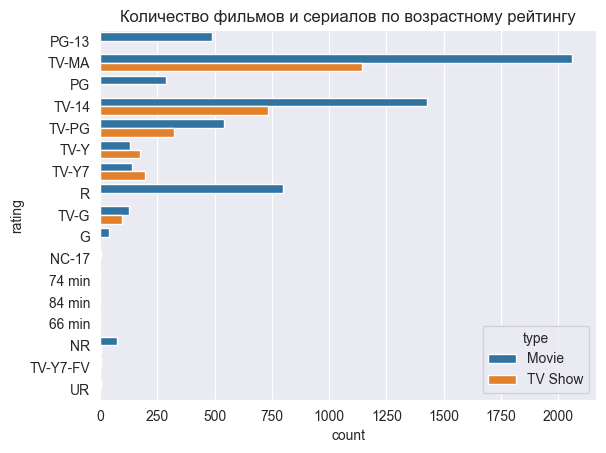

In [173]:
sns.countplot(data=df, y = 'rating', hue = 'type')
plt.title('Количество фильмов и сериалов по возрастному рейтингу')
plt.show()

Из графика видим, что наибольшее количество фильмов и сериалов имеют рейтинг TV-MA. Кроме того в перечне значений рейтинга есть вроде бы не очень относящиеся к рейтингу значения в 74, 84 и 66 минут. Выше было описано, что в данных есть три фильма/сериала с пустой длительностью. Не их ли длительность попала в поле rating?

In [175]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,film_duration,tv_series_duration
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017.0,NaN,NaN
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016.0,NaN,NaN
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016.0,NaN,NaN


Действительно, похоже три пропуска в duration нашлись в поле rating. 

Теперь посмотрим на зависимость возрастной категории и года выпуска, предварительно исключив из рассмотрения найденные ошибочные значения рейтинга.  

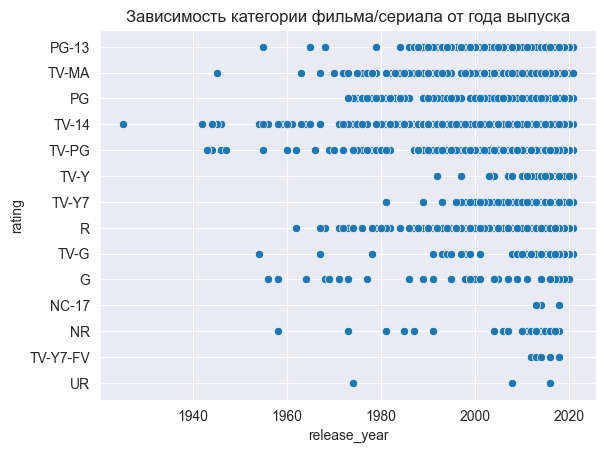

In [179]:
sns.scatterplot(data=df[~df['duration'].isna()], x = 'release_year', y = 'rating')
plt.title('Зависимость категории фильма/сериала от года выпуска')
plt.show()

Из графика видно, что со временем увеличивается число рейтингов и количество фильмов, относящихся к ним. 


**Заключение**

Выше были показаны некоторые закономерности и характеристики данных в датасете от Netflix. Представляется, что для более глубокого анализа требуется определить соответствующую цель: например, прогнозирование некоторого целевого признака фильма по другим его характеристикам. В этом случае возможно провести дополнительный анализ данных, направленный на выявление закономерностей, влияющих на поставленную задачу прогнозирования. 